__Purpose:__ Analyze basic personalization scheme of simply doing Smoothbatch between the global and local models.  E.g. model interpolation to get a personalized model.
> Observed results: the personalized model literally just inhabits the space between the local and global models, which makes sense since it's just a weighting between the two.  Does this imply that the cost function is simpler than we thought (e.g. there aren't as many local mins and it's sort of just a 1D scale like we were seeing before)?
- Can vary smoothbatch (percent new vs old)

In [1]:
import pandas as pd
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import copy

import seaborn as sns
from presentation_sns_config import *

from experiment_params import *
from cost_funcs import *
from fl_sim_classes import *
import time
import pickle
from sklearn.decomposition import PCA

In [2]:
path = r'C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Data'
cond0_filename = r'\cond0_dict_list.p'
all_decs_init_filename = r'\all_decs_init.p'
nofl_decs_filename = r'\nofl_decs.p'
id2color = {0:'lightcoral', 1:'maroon', 2:'chocolate', 3:'darkorange', 4:'gold', 5:'olive', 6:'olivedrab', 
            7:'lawngreen', 8:'aquamarine', 9:'deepskyblue', 10:'steelblue', 11:'violet', 12:'darkorchid', 13:'deeppink'}
implemented_client_training_methods = ['EtaGradStep', 'EtaScipyMinStep', 'FullScipyMinStep']
implement_these_methods_next = ['APFL', 'AFL', 'PersA_FL_MAML', 'PersA_FL_ME', 'PFA']
num_participants = 14

# For exclusion when plotting later on
bad_nodes = [1,3,13]

with open(path+cond0_filename, 'rb') as fp:
    cond0_training_and_labels_lst = pickle.load(fp)
    
with open(path+all_decs_init_filename, 'rb') as fp:
    init_decoders = pickle.load(fp)
cond0_init_decs = [dec[0, :, :] for dec in init_decoders]

D_0 = np.random.rand(2,64)
D_0_7 = np.random.rand(2,7)

big_loop_iters = 500

# Testing Various SmoothBatches
> 10 Scipy Steps

In [3]:
sb1 = 0.01

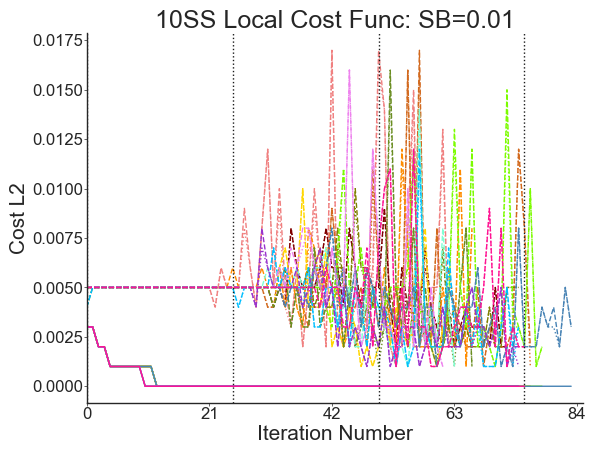

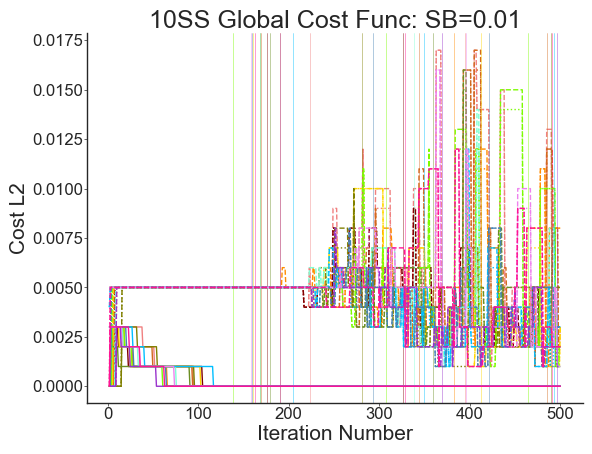

In [4]:
user_sb1 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', mix_in_each_steps=True, smoothbatch=sb1, mix_mixed_SB=True, num_steps=10, delay_scaling=0) for i in range(14)]
global_sb1 = Server(2, D_0_7, 'FedAvgSB', user_sb1, smoothbatch=sb1)

for i in range(big_loop_iters):
    global_sb1.execute_FL_loop()
    
condensed_external_plotting(user_sb1, 'local', pers_error=True, custom_title=f'10SS Local Cost Func: SB={sb1}')
condensed_external_plotting(global_sb1, 'global', pers_error=True, custom_title=f'10SS Global Cost Func: SB={sb1}')

In [5]:
sb1_ = 0.1

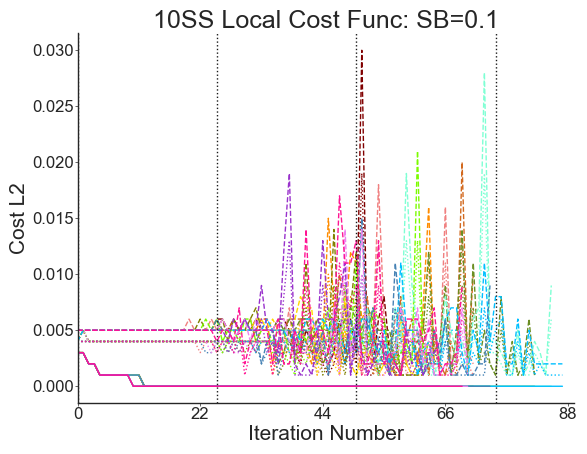

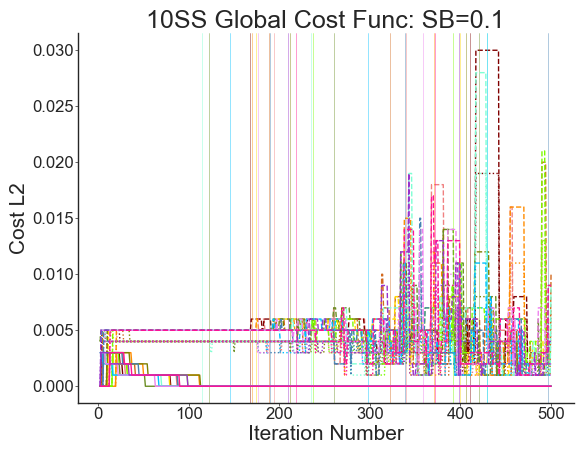

In [6]:
user_sb1_ = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', mix_in_each_steps=True, smoothbatch=sb1_, mix_mixed_SB=True, num_steps=10, delay_scaling=0) for i in range(14)]
global_sb1_ = Server(2, D_0_7, 'FedAvgSB', user_sb1_, smoothbatch=sb1_)

for i in range(big_loop_iters):
    global_sb1_.execute_FL_loop()
    
condensed_external_plotting(user_sb1_, 'local', pers_error=True, custom_title=f'10SS Local Cost Func: SB={sb1_}')
condensed_external_plotting(global_sb1_, 'global', pers_error=True, custom_title=f'10SS Global Cost Func: SB={sb1_}')

In [7]:
sb2 = 0.5

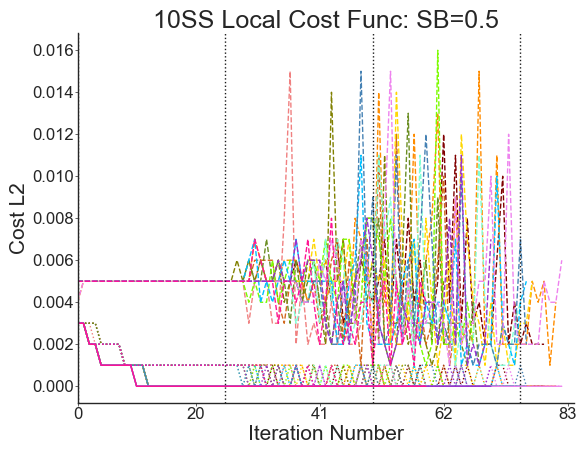

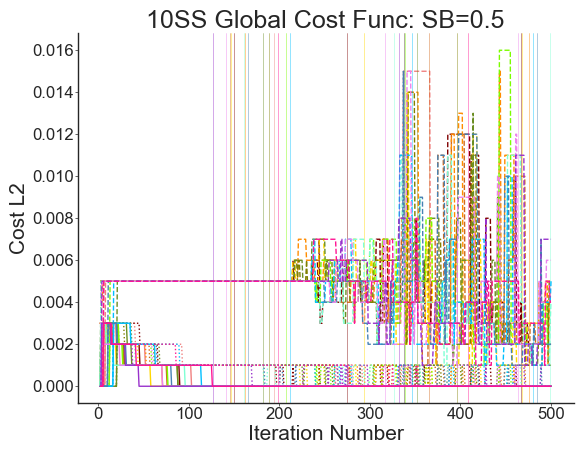

In [8]:
user_sb2 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', smoothbatch=sb2, mix_in_each_steps=True, mix_mixed_SB=True, num_steps=10, delay_scaling=0) for i in range(14)]
global_sb2 = Server(2, D_0_7, 'FedAvgSB', user_sb2, smoothbatch=sb2)

for i in range(big_loop_iters):
    global_sb2.execute_FL_loop()
    
condensed_external_plotting(user_sb2, 'local', pers_error=True, custom_title=f'10SS Local Cost Func: SB={sb2}')
condensed_external_plotting(global_sb2, 'global', pers_error=True, custom_title=f'10SS Global Cost Func: SB={sb2}')

In [9]:
sb3 = 0.75

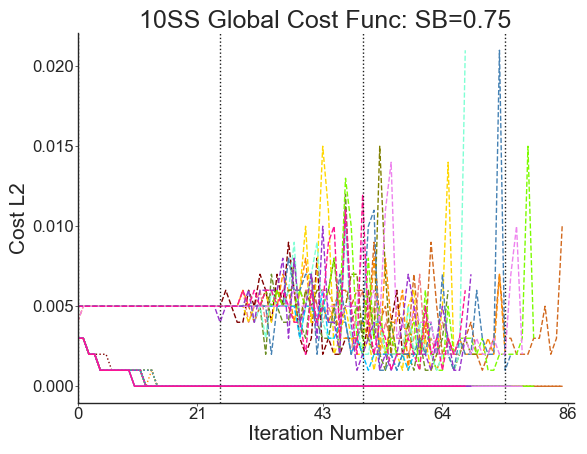

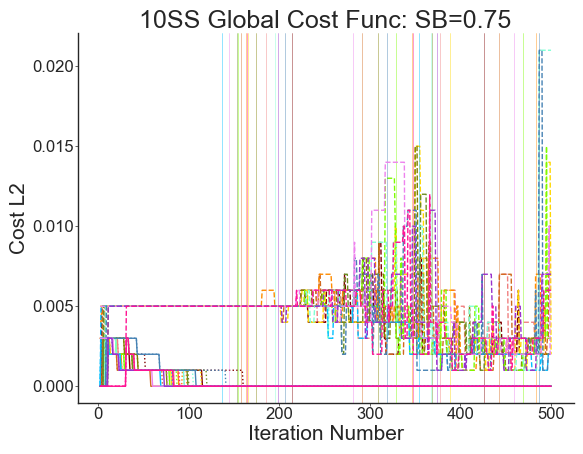

In [10]:
user_sb3 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', mix_in_each_steps=True, smoothbatch=sb3, mix_mixed_SB=True, num_steps=10, delay_scaling=0) for i in range(14)]
global_sb3 = Server(2, D_0_7, 'FedAvgSB', user_sb3, smoothbatch=sb3)

for i in range(big_loop_iters):
    global_sb3.execute_FL_loop()
    
condensed_external_plotting(user_sb3, 'local', pers_error=True, custom_title=f'10SS Global Cost Func: SB={sb3}')
condensed_external_plotting(global_sb3, 'global', pers_error=True, custom_title=f'10SS Global Cost Func: SB={sb3}')

In [11]:
sb4 = 0.9

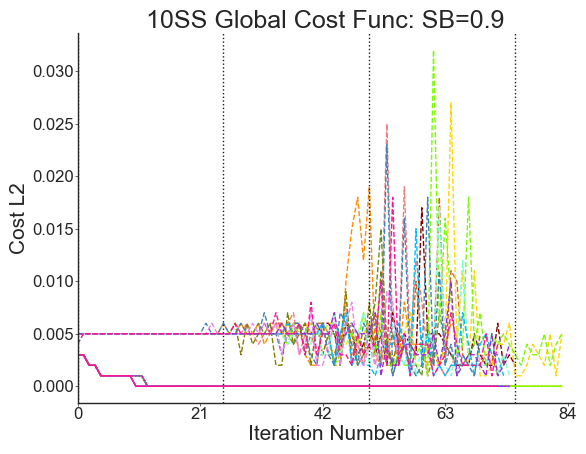

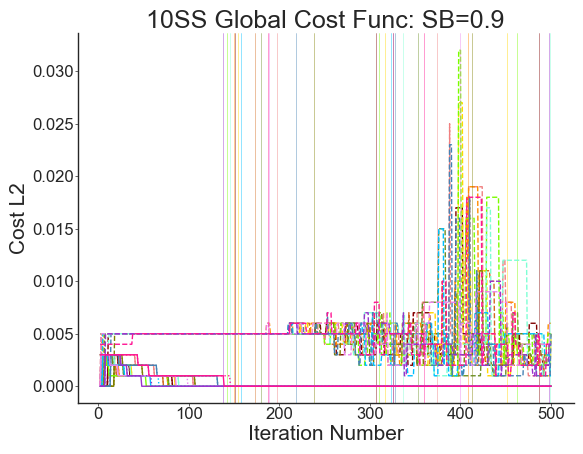

In [12]:
user_sb4 = [Client(i, D_0_7, 'EtaScipyMinStep', cond0_training_and_labels_lst[i], 'streaming', smoothbatch=sb4, mix_in_each_steps=True, mix_mixed_SB=True, num_steps=10, delay_scaling=0) for i in range(14)]
global_sb4 = Server(2, D_0_7, 'FedAvgSB', user_sb4, smoothbatch=sb4)

for i in range(big_loop_iters):
    global_sb4.execute_FL_loop()
    
condensed_external_plotting(user_sb4, 'local', pers_error=True, custom_title=f'10SS Global Cost Func: SB={sb4}')
condensed_external_plotting(global_sb4, 'global', pers_error=True, custom_title=f'10SS Global Cost Func: SB={sb4}')

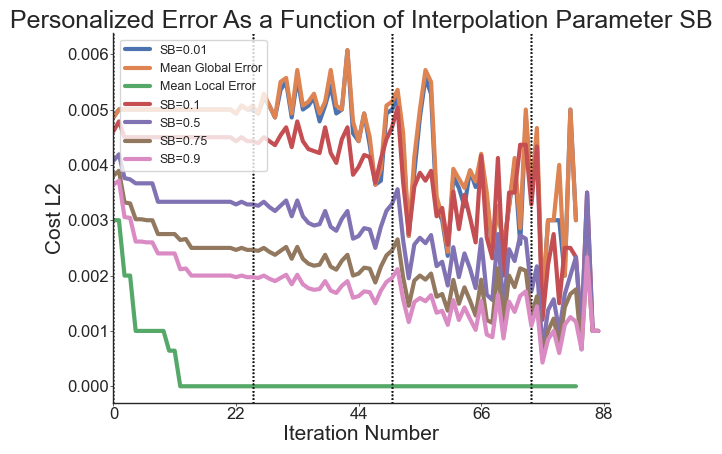

In [13]:
all_users, all_dfs, all_vecs = central_tendency_plotting([user_sb1, user_sb1_, user_sb2, user_sb3, user_sb4], iterable_labels=['SB=0.01', 'SB=0.1', 'SB=0.5', 'SB=0.75', 'SB=0.9'], input_linewidth=3, my_legend_loc='upper left', default_local=True, default_global=True, local_error=False, pers_error=True, global_error=False, custom_title='Personalized Error As a Function of Interpolation Parameter SB')

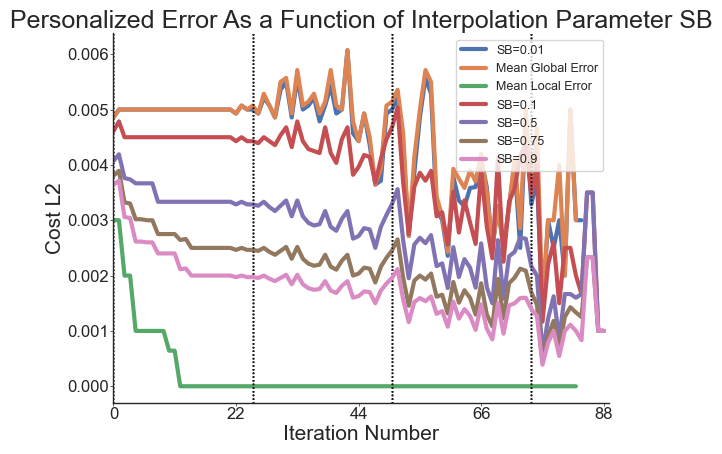

In [19]:
all_users, all_dfs, all_vecs = central_tendency_plotting([user_sb1, user_sb1_, user_sb2, user_sb3, user_sb4], iterable_labels=['SB=0.01', 'SB=0.1', 'SB=0.5', 'SB=0.75', 'SB=0.9'], input_linewidth=3, default_local=True, default_global=True, local_error=False, pers_error=True, global_error=False, custom_title='Personalized Error As a Function of Interpolation Parameter SB')

In [14]:
user_list = [user_sb1, user_sb1_, user_sb2, user_sb3, user_sb4]

max_pers_length = 0
min_pers_length = 100000000
for udb_idx, user_database in enumerate([user_sb1, user_sb1_, user_sb2, user_sb3, user_sb4]):
    for u_idx, user in enumerate(user_database):
        my_length = len(user.pers_error_log)
        if my_length > max_pers_length:
            max_pers_length = my_length
        elif my_length < min_pers_length:
            min_pers_length = my_length
            
print(max_pers_length)
print(min_pers_length)
avg_pers_length = (max_pers_length + min_pers_length)/2

cushion_factor=3

88
49


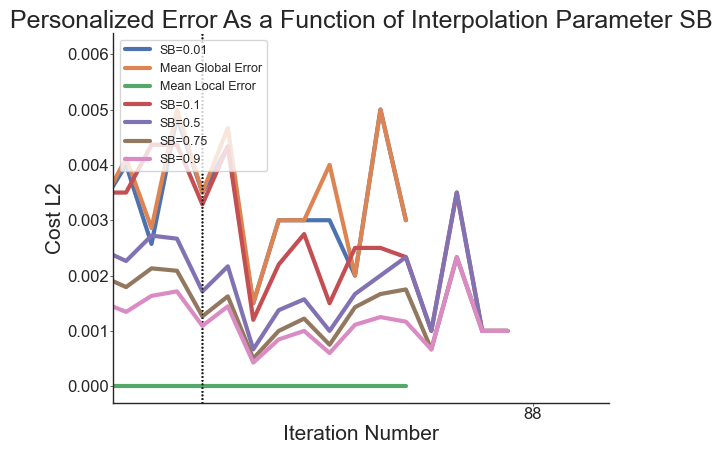

In [15]:
all_users, all_dfs, all_vecs = central_tendency_plotting([user_sb1, user_sb1_, user_sb2, user_sb3, user_sb4], iterable_labels=['SB=0.01', 'SB=0.1', 'SB=0.5', 'SB=0.75', 'SB=0.9'], input_linewidth=3, my_legend_loc='upper left', default_local=True, default_global=True, local_error=False, pers_error=True, global_error=False, xlim_max=max_pers_length+cushion_factor, xlim_min=avg_pers_length+cushion_factor, custom_title='Personalized Error As a Function of Interpolation Parameter SB')

## Now train pers models for 1 comm round to compare with "local" models
- train_given_model_1_comm_round

In [16]:
pre_training_acc = [0]*5*14
post_training_acc = [0]*5*14

for udb_idx, user_database in enumerate([user_sb1, user_sb1_, user_sb2, user_sb3, user_sb4]):
    for u_idx, user in enumerate(user_database):
        counting_idx = udb_idx*14+u_idx
        pre_training_acc[counting_idx] = user.pers_error_log[-1]
        user.mixed_w, temp_acc = user.train_given_model_1_comm_round(user.mixed_w, 'pers')
        post_training_acc[counting_idx] = temp_acc
        user.pers_error_log.append(temp_acc)

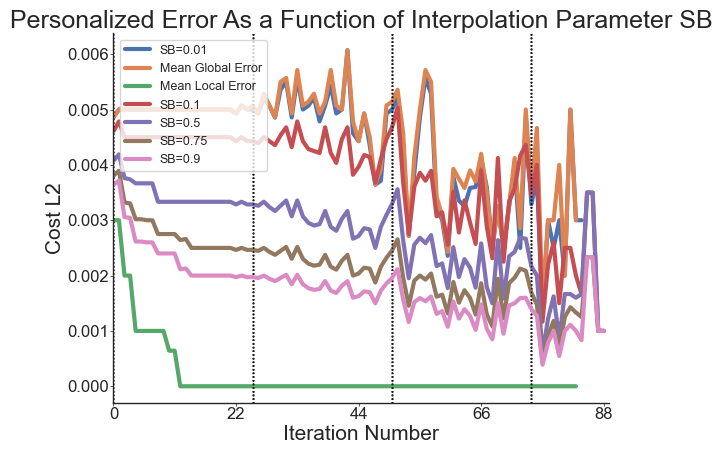

In [17]:
all_users, all_dfs, all_vecs = central_tendency_plotting([user_sb1, user_sb1_, user_sb2, user_sb3, user_sb4], iterable_labels=['SB=0.01', 'SB=0.1', 'SB=0.5', 'SB=0.75', 'SB=0.9'], input_linewidth=3, my_legend_loc='upper left', default_local=True, default_global=True, local_error=False, pers_error=True, global_error=False, custom_title='Personalized Error As a Function of Interpolation Parameter SB')

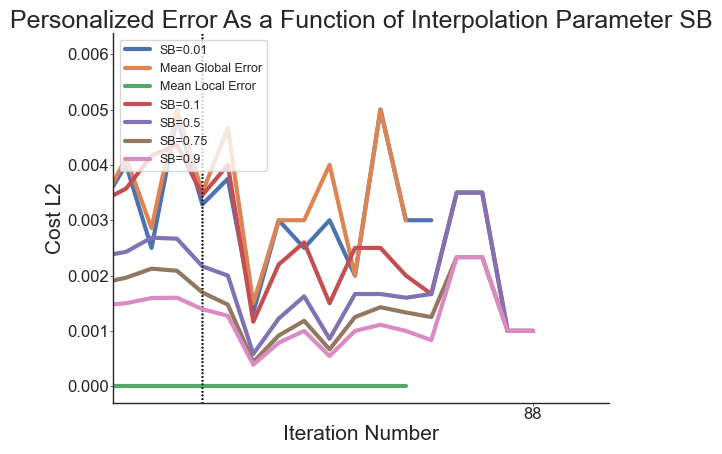

In [18]:
all_users, all_dfs, all_vecs = central_tendency_plotting([user_sb1, user_sb1_, user_sb2, user_sb3, user_sb4], iterable_labels=['SB=0.01', 'SB=0.1', 'SB=0.5', 'SB=0.75', 'SB=0.9'], input_linewidth=3, my_legend_loc='upper left', default_local=True, default_global=True, local_error=False, pers_error=True, global_error=False, xlim_max=max_pers_length+cushion_factor, xlim_min=avg_pers_length+cushion_factor, custom_title='Personalized Error As a Function of Interpolation Parameter SB')